**Configuração, Carregamento de Bibliotecas e Estilo**

# Instalar Ferramentas (Bibliotecas Python):

In [15]:
# Carregamento das Ferramentas (Bibliotecas)
import pandas as pd # Importa a biblioteca Pandas, essencial para manipulação e estruturação de dados (DataFrames)
import matplotlib.pyplot as plt # Importa Matplotlib, principal biblioteca para criação de gráficos
import seaborn as sns # Importa Seaborn, biblioteca construída sobre Matplotlib para gráficos estatísticos mais sofisticados e estéticos.
import numpy as np # Importa NumPy, essencial para operações numéricas e matemáticas de alto desempenho.

# Configuração visual dos gráficos
sns.set_style('whitegrid') # Define o estilo padrão dos gráficos do Seaborn para um fundo branco com linhas de grade

In [16]:
# Carregamento dos Dados

# Carregando as 4 tabelas (Lendo os arquivos CSV)
# usei o 'latin-1' para evitar problemas com acentos (encoding)
try: # Inicia um bloco para tentar carregar os arquivos, permitindo a captura de erros de arquivos não encontrados
    df_brasil = pd.read_csv('/content/br_inep_ideb_brasil.csv') # Carrega a tabela de dados do IDEB Nível Brasil
    df_uf = pd.read_csv('/content/br_inep_ideb_uf.csv') # Carrega a tabela de dados do IDEB Nível Estado (UF)
    df_regiao = pd.read_csv('/content/br_inep_ideb_regiao.csv') # Carrega a tabela de dados do IDEB Nível Região
    df_municipio = pd.read_csv('/content/br_inep_ideb_municipio.csv') # Carrega a tabela de dados do IDEB Nível Município

    print("4 Tabelas carregadas com sucesso!") # Mensagem exibida se todas as leituras forem bem-sucedidas
except FileNotFoundError: # Caso um dos arquivos não seja encontrado, o bloco except é executado
    print("ERRO: Certifique-se de que os 4 arquivos estão na pasta do colab.") # Informa o usuário sobre o arquivo ausente

4 Tabelas carregadas com sucesso!


# Tratamento e Preparação dos Dados (A Limpeza Profunda)

In [17]:
# Identificar e Tratar Valores Ausentes (IDEB)
# O valor ideb é o mais importante. Onde ele está vazio, a linha não nos serve para análise

# Foco na tabela de Estados (UF) para a maior parte da análise
df_uf_limpo = df_uf.copy() # Cria uma cópia explícita do DF de Estados para evitar modificar o original

# 1. Tratar Valores Ausentes (Removendo linhas sem nota IDEB)
df_uf_limpo = df_uf_limpo.dropna(subset=['ideb']) # Remove linhas inteiras onde a coluna ideb possui valores ausentes (NaN/null)
print(f"linhas removidas (sem IDEB): {len(df_uf) - len(df_uf_limpo)}") # Calcula e exibe quantas linhas foram descartadas

# 2. Preencher a 'projecao' (Meta) vazia com zero para evitar erros nos cálculos
df_uf_limpo['projecao'] = df_uf_limpo['projecao'].fillna(0) # Preenche quaisquer valores ausentes na coluna projecao (metas) com zero

linhas removidas (sem IDEB): 24


In [18]:
# Padronizar Formatos (Datas e Números)
# Padronizar formatos de dados (exemplo: datas, categorias, numéricos)

# 1. Padronizar a coluna de Data (Ano) para inteiro
df_uf_limpo['ano'] = df_uf_limpo['ano'].astype(int) # Converte a coluna ano para o tipo inteiro

# 2. Padronizar a coluna IDEB e Projeção para número (float)
colunas_numericas = ['ideb','projecao','taxa_aprovacao'] # Define uma lista de colunas a serem convertidas
for col in colunas_numericas: # Inicia um loop para iterar sobre as colunas
  # Usei pd.to_numeric com errors='coerce' para transformar textos estranhos em NaN, caso existam
  df_uf_limpo[col] = pd.to_numeric(df_uf_limpo[col], errors='coerce') # Converte cada coluna para tipo numérico (float). O argumento errors='coerce' garante que qualquer valor não numérico seja transformado em NaN

# Engenharia de Recursos (Feature Engineering)

In [19]:
# Criar Novas Colunas (Engenharia de Recursos)

# Coluna 1: Diferença entre o IDEB alcançado e a Meta projetada
df_uf_limpo['diferenca_meta'] = df_uf_limpo['ideb'] - df_uf_limpo['projecao'] # Cria uma nova coluna subtraindo a meta do IDEB alcançado. Valores positivos indicam que a meta foi superada

# Coluna 2: Status da Meta (Uma categoria de texto fácil de entender)
df_uf_limpo['status_meta'] = df_uf_limpo['ideb'] >= df_uf_limpo['projecao'] # Cria uma coluna booleana (True/False) verificando se o IDEB atingiu ou superou a meta
df_uf_limpo['status_meta'] = df_uf_limpo['status_meta'].map({True: 'Meta Atingida', False: 'Abaixo da Meta'}) # Mapeia os valores booleanos para categorias de texto mais legíveis

print("\nTratamento e preparação concluídos!") # Mensagem de Conclusão
df_uf_limpo.head() # Exibe as primeiras 5 linhas do DataFrame limpo, incluindo as novas colunas criadas


Tratamento e preparação concluídos!


,ano,sigla_uf,rede,ensino,anos_escolares,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb,projecao,diferenca_meta,status_meta
0,2021,AC,total,medio,todos (1-4),86.4,0.867481,268.90,275.99,4.597786,4.0,0.0,4.0,Meta Atingida
1,2021,DF,estadual,medio,todos (1-4),84.8,0.851847,271.40,277.77,4.659546,4.0,0.0,4.0,Meta Atingida
2,2021,AM,total,medio,todos (1-4),91.6,0.916517,247.95,257.62,4.028545,3.7,0.0,3.7,Meta Atingida
3,2005,BA,privada,medio,todos (1-4),90.0,0.917399,327.20,302.30,5.810806,5.3,0.0,5.3,Meta Atingida
4,2021,RR,total,medio,todos (1-4),86.7,0.899066,262.87,267.96,4.392886,3.9,0.0,3.9,Meta Atingida


# Análise Exploratória (O Detetive dos Dados)

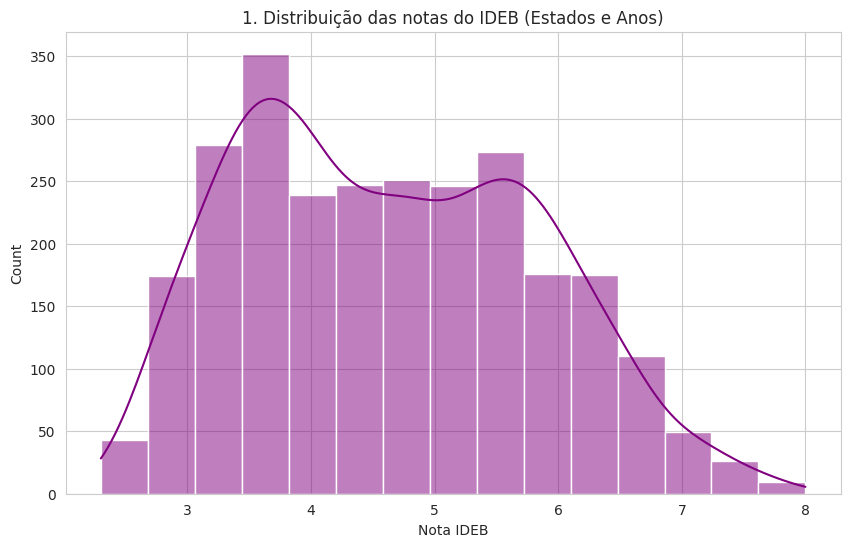

In [20]:
# Análise 1: Distribuição das Notas IDEB (Histograma) Tipo: Distribuição
plt.figure(figsize=(10, 6)) # Define o tamanho do gráfico
sns.histplot(df_uf_limpo['ideb'], bins=15, kde=True, color='purple') # Cria um histograma para visualizar a distribuição das notas IDEB. O kde=True adiciona uma curva de densidade
plt.title('1. Distribuição das notas do IDEB (Estados e Anos)') # define o título
plt.xlabel('Nota IDEB') # rótulo do eixo X
plt.show() # exibe o gráfico

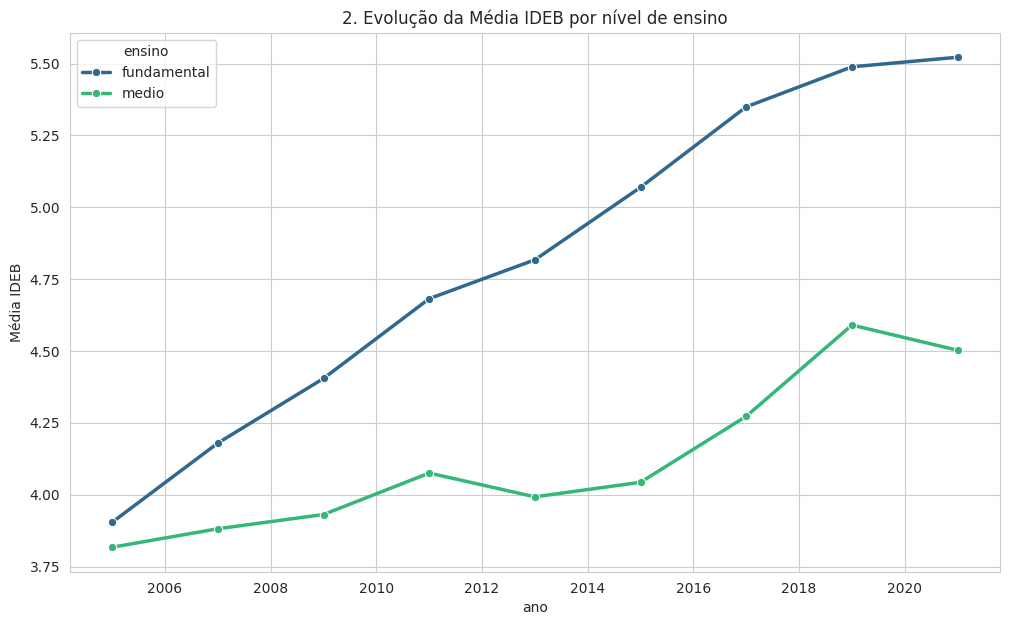

In [21]:
# Análise 2: Evolução Média por Ensino (Linha) Tipo: Tendência/Média ao longo do tempo

# Agrupando a média do IDEB por ano e nível de ensino
df_tendencia = df_uf_limpo.groupby(['ano', 'ensino'])['ideb'].mean().reset_index() # Calcula a média do IDEB agrupada por ano e por ensino (fundamental/médio)

plt.figure(figsize=(12, 7)) # Define o tamanho do gráfico
sns.lineplot(data=df_tendencia, x='ano', y='ideb', hue='ensino', marker='o', palette='viridis', linewidth=2.5) # Cria um gráfico de linhas para mostrar a tendência da média do IDEB ao longo dos anos, separada por nível de ensino
plt.title('2. Evolução da Média IDEB por nível de ensino') # título do gráfico
plt.ylabel("Média IDEB") # rótulo do eixo Y
plt.show() # exibe o gráfico

/tmp/ipython-input-2412448916.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_uf_limpo, x='rede', y='ideb', palette='Set2') # Cria um boxplot para comparar a distribuição, média, mediana e outliers do IDEB entre as redes de ensino (pública vs. privada)


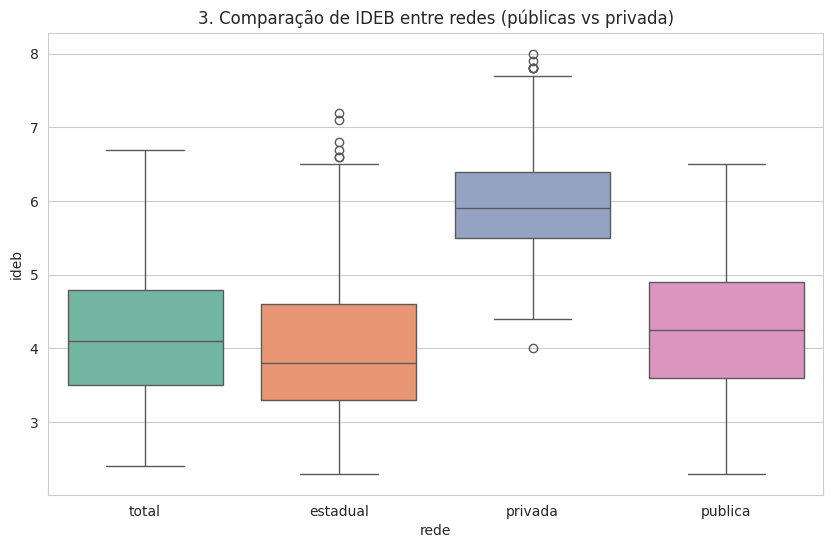

In [22]:
# Análise 3: Outliers (Boxplot) Tipo: Outliers e Dispersão (Média e Mediana)
plt.figure(figsize=(10, 6)) # Define o tamanho do gráfico
sns.boxplot(data=df_uf_limpo, x='rede', y='ideb', palette='Set2') # Cria um boxplot para comparar a distribuição, média, mediana e outliers do IDEB entre as redes de ensino (pública vs. privada)
plt.title('3. Comparação de IDEB entre redes (públicas vs privada)') # Título do gráfico
plt.show() # exibe o gráfico

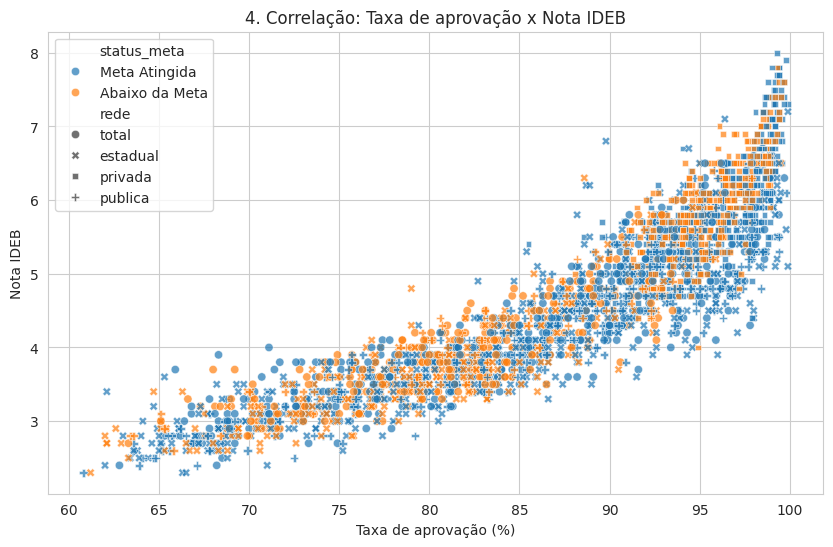

In [23]:
# Análise 4: Correlação (Scatter Plot) Tipo: Correlação
plt.figure(figsize=(10, 6)) # Define o tamanho do gráfico
sns.scatterplot(data=df_uf_limpo, x='taxa_aprovacao', y='ideb', hue='status_meta', style='rede', alpha=0.7) # Cria um gráfico de dispersão para analisar a correlação entre a taxa_aprovacao e a nota ideb, diferenciando por status_meta (Meta Atingida/Abaixo) e rede
plt.title('4. Correlação: Taxa de aprovação x Nota IDEB') # título do gráfico
plt.xlabel('Taxa de aprovação (%)') # rótulo do eixo X
plt.ylabel('Nota IDEB') # rótulo do eixo Y
plt.show() # exibe o gráfico

/tmp/ipython-input-1640271895.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ranking_estados, x='sigla_uf', y='ideb', palette='rocket') # Cria um gráfico de barras para visualizar o ranking dos 10 melhores estados


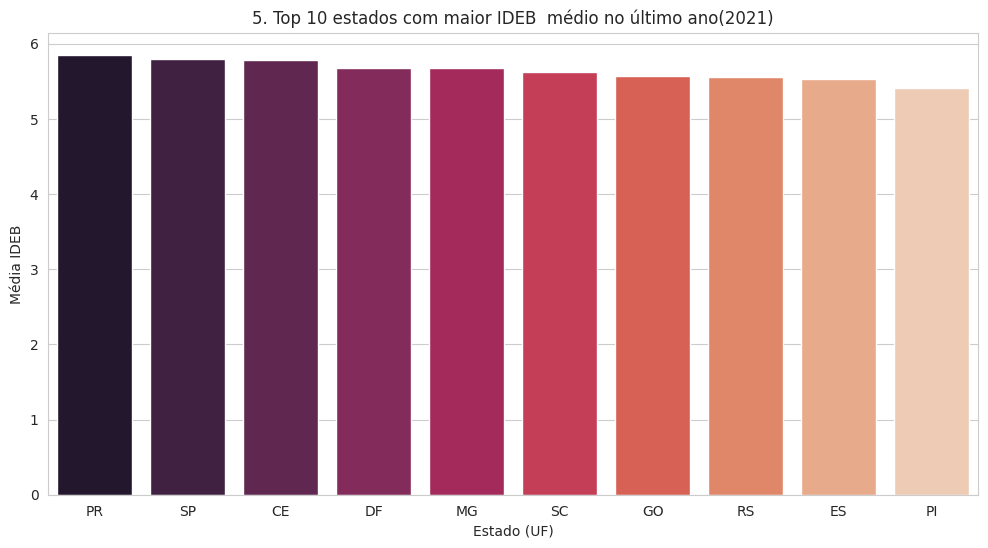


 5 Análises exploratórias realizadas com gráficos e insights!


In [24]:
# Análise 5: Desempenho Recente (Gráfico de Barras) Tipo: Ranking / Comparação de Média

# Filtrando o último ano disponível (assumindo 2021) e pegando a média por UF
dados_recente = df_uf_limpo[df_uf_limpo['ano'] == df_uf_limpo['ano'].max()] # Filtra o DataFrame para incluir apenas os dados do último ano disponível
ranking_estados = dados_recente.groupby('sigla_uf')['ideb'].mean().sort_values(ascending=False).head(10).reset_index() # Calcula a média do IDEB para cada estado no ano mais recente, ordena e seleciona o Top 10

plt.figure(figsize=(12, 6)) # Define o tamanho do gráfico
sns.barplot(data=ranking_estados, x='sigla_uf', y='ideb', palette='rocket') # Cria um gráfico de barras para visualizar o ranking dos 10 melhores estados
plt.title(f"5. Top 10 estados com maior IDEB  médio no último ano({df_uf_limpo['ano'].max()})") # Título do Gráfico (incluindo o ano máximo)
plt.ylabel('Média IDEB') # Rótulo do eixo X
plt.xlabel('Estado (UF)') # Rótulo do eixo Y
plt.show() # exibe o gráfico

print("\n 5 Análises exploratórias realizadas com gráficos e insights!") # Mensagem de Conclusão

# Salvar Dados Tratados e Relatório

In [25]:
# Salvando o arquivo limpo para ser usado no Looker Studio
df_uf_limpo.to_csv('ideb_uf_tratado.csv', index=False) # Salva o DataFrame tratado df_uf_limpo em um novo arquivo CSV, excluindo o índice do Pandas
print("Arquivo ideb_uf_tratado.csv salvo!") # Confirmação

Arquivo ideb_uf_tratado.csv salvo!
